In [1]:
data <- read.table("chr19.csv", col.names = c("bin_id","chr","start","end","input_label","cpg_number","class_label","methylation","read_number","cpg_pattern","A","B","A_norm",
                                           "B_norm","delta","A_sum","B_sum","p_val","p_adj"), sep = ",")


head(data,10)
# meth <- data$methylation
# read_number <- data$read_number

# methResult <- c()
# readResult <- c()

# for (i in 1: length(meth)){
#   if (!meth[i] %in% methResult) {
#     methResult <- append(methResult, meth[i])
#     readResult <- append(readResult, read_number[i])
#   } else {
#     readResult[match(meth[i], methResult)] = readResult[match(meth[i], methResult)] + read_number[i]
#   }
# }

bin_id,chr,start,end,input_label,cpg_number,class_label,methylation,read_number,cpg_pattern,A,B,A_norm,B_norm,delta,A_sum,B_sum,p_val,p_adj
chr19_3079000,chr19,3078900,3079000,AB,2,0,100,191,1;1,72,119,69.230769,69.186047,0.04472272,104,172,1.00000000,1.0000000
chr19_3079000,chr19,3078900,3079000,AB,2,1,50,27,1;0,10,17,9.615385,9.883721,-0.26833631,104,172,1.00000000,1.0000000
chr19_3079000,chr19,3078900,3079000,AB,2,2,50,48,0;1,17,31,16.346154,18.023256,-1.67710197,104,172,0.87189565,1.0000000
chr19_3079000,chr19,3078900,3079000,AB,2,3,0,10,0;0,5,5,4.807692,2.906977,1.90071556,104,172,0.51295993,1.0000000
chr19_3079600,chr19,3079500,3079600,AB,2,0,0,21,0;0,5,16,6.849315,14.953271,-8.10395596,73,107,0.16091090,0.5073756
chr19_3079600,chr19,3079500,3079600,AB,2,1,50,16,1;0,7,9,9.589041,8.411215,1.17782614,73,107,0.79718249,0.7971825
chr19_3079600,chr19,3079500,3079600,AB,2,2,100,130,1;1,58,72,79.452055,67.289720,12.16233517,73,107,0.48674388,0.6489918
chr19_3079600,chr19,3079500,3079600,AB,2,3,50,13,0;1,3,10,4.109589,9.345794,-5.23620535,73,107,0.25368778,0.5073756
chr19_3079800,chr19,3079700,3079800,AB,2,0,100,185,1;1,77,108,53.472222,61.714286,-8.24206349,144,175,0.45753841,0.6100512
chr19_3079800,chr19,3079700,3079800,AB,2,1,50,107,1;0,59,48,40.972222,27.428571,13.54365079,144,175,0.07498293,0.1499659


In [20]:
#write.csv(data, "new_chr_19.csv")

In [2]:
#methResult
#readResult

In [3]:
# combinedResult <- c()

# for (i in 1:length(methResult)) {
#   combinedResult <- append(combinedResult, rep(methResult[i], readResult[i]))
# }

# #combinedResult

# hist(combinedResult, prob = TRUE)
# lines(density(combinedResult), col = 'red')

# no100combinedResult <- c()

# for (i in 1:length(methResult)) {
#   if(methResult[i] != 100) {no100combinedResult <- append(no100combinedResult, rep(methResult[i], readResult[i]))}
# }

# hist(no100combinedResult, prob = TRUE)
# lines(density(no100combinedResult), col = 'blue')

In [4]:
# combinedResult <- sort(combinedResult)
# quantile(combinedResult, prob = c(0.33,0.67))

In [21]:
# Per Bin
# Standard Settings
lowStandard <- 35.0
highStandard <- 70.0

In [28]:
binID <- data$bin_id
start <- data$start
meth <- data$methylation
aNorm <- data$A_norm
bNorm <- data$B_norm
cata <- c()

df <- data.frame(binID, start, meth, aNorm, bNorm)

for (i in 1:length(meth)){
  if (meth[i] < lowStandard) {
    cata <- append(cata, 1)
  } else if(meth[i] < highStandard){
    cata <- append(cata, 2)
  } else {
    cata <- append(cata, 3)
  }
}


df <- cbind(df, cata)
df

binID,start,meth,aNorm,bNorm,cata
chr19_3079000,3078900,100.00000,69.230769,69.186047,3
chr19_3079000,3078900,50.00000,9.615385,9.883721,2
chr19_3079000,3078900,50.00000,16.346154,18.023256,2
chr19_3079000,3078900,0.00000,4.807692,2.906977,1
chr19_3079600,3079500,0.00000,6.849315,14.953271,1
chr19_3079600,3079500,50.00000,9.589041,8.411215,2
chr19_3079600,3079500,100.00000,79.452055,67.289720,3
chr19_3079600,3079500,50.00000,4.109589,9.345794,2
chr19_3079800,3079700,100.00000,53.472222,61.714286,3
chr19_3079800,3079700,50.00000,40.972222,27.428571,2


In [29]:
df$cata <- factor(df$cata, levels = c(3, 2, 1), labels = c("high", "medium", "low"))

In [30]:
df <- df[order(df$start, df$cata),]
df

,binID,start,meth,aNorm,bNorm,cata
1,chr19_3079000,3078900,100.00000,69.230769,69.186047,high
2,chr19_3079000,3078900,50.00000,9.615385,9.883721,medium
3,chr19_3079000,3078900,50.00000,16.346154,18.023256,medium
4,chr19_3079000,3078900,0.00000,4.807692,2.906977,low
7,chr19_3079600,3079500,100.00000,79.452055,67.289720,high
6,chr19_3079600,3079500,50.00000,9.589041,8.411215,medium
8,chr19_3079600,3079500,50.00000,4.109589,9.345794,medium
5,chr19_3079600,3079500,0.00000,6.849315,14.953271,low
9,chr19_3079800,3079700,100.00000,53.472222,61.714286,high
10,chr19_3079800,3079700,50.00000,40.972222,27.428571,medium


In [25]:
testdf <- head(df, 100)
testdf

,binID,start,meth,aNorm,bNorm,cata
1,chr19_3079000,3078900,100.00000,69.230769,69.186047,high
2,chr19_3079000,3078900,50.00000,9.615385,9.883721,medium
3,chr19_3079000,3078900,50.00000,16.346154,18.023256,medium
4,chr19_3079000,3078900,0.00000,4.807692,2.906977,low
7,chr19_3079600,3079500,100.00000,79.452055,67.289720,high
6,chr19_3079600,3079500,50.00000,9.589041,8.411215,medium
8,chr19_3079600,3079500,50.00000,4.109589,9.345794,medium
5,chr19_3079600,3079500,0.00000,6.849315,14.953271,low
9,chr19_3079800,3079700,100.00000,53.472222,61.714286,high
10,chr19_3079800,3079700,50.00000,40.972222,27.428571,medium


In [11]:
library(ggplot2)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


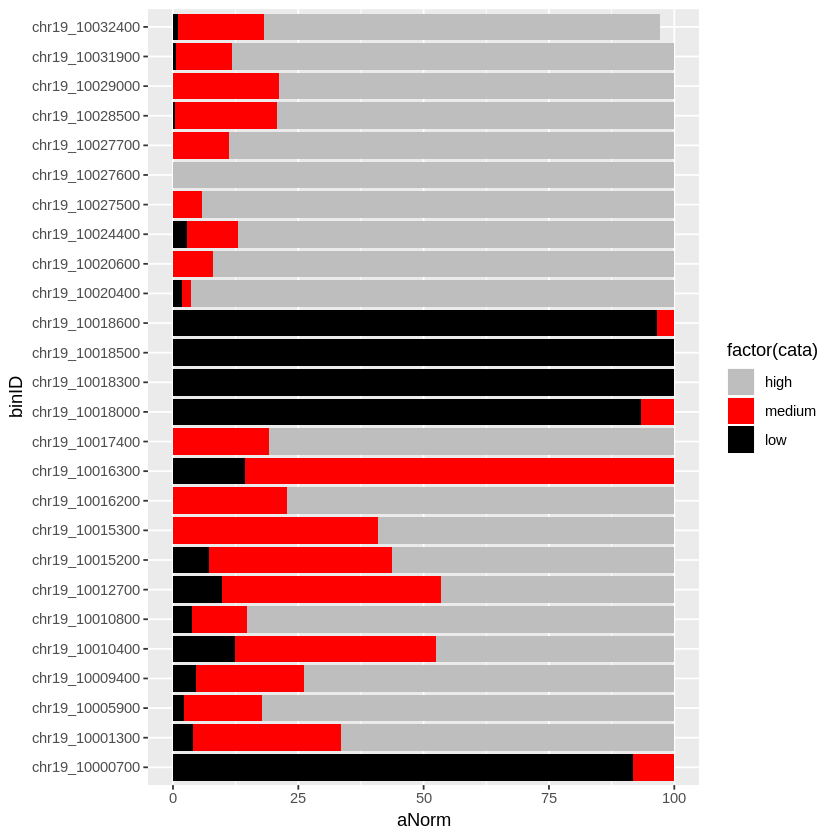

In [12]:
ggplot(data = testdf, aes(x = binID, y = aNorm, fill = factor(cata))) + 
  geom_bar(stat = "identity") + coord_flip() + scale_fill_manual(values = c("grey", "red", "black"))

Warning message:
“position_stack requires non-overlapping x intervals”

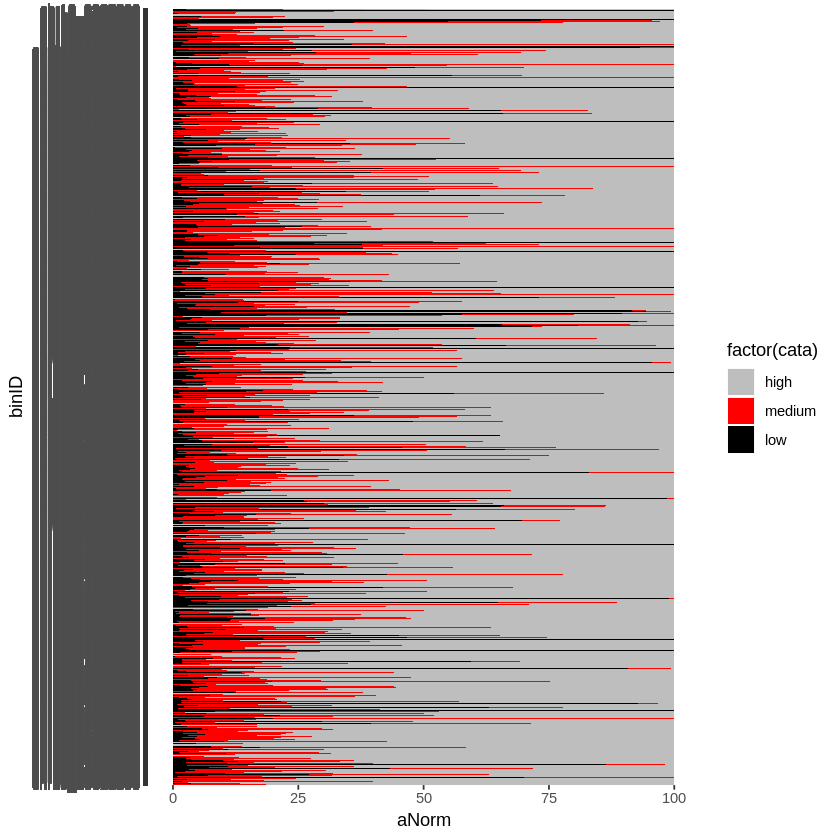

In [25]:
# A components
ggplot(data = df, aes(x = binID, y = aNorm, fill = factor(cata))) + 
  geom_bar(stat = "identity", width = 2) + coord_flip() + scale_fill_manual(values = c("grey", "red", "black"))

Warning message:
“position_stack requires non-overlapping x intervals”

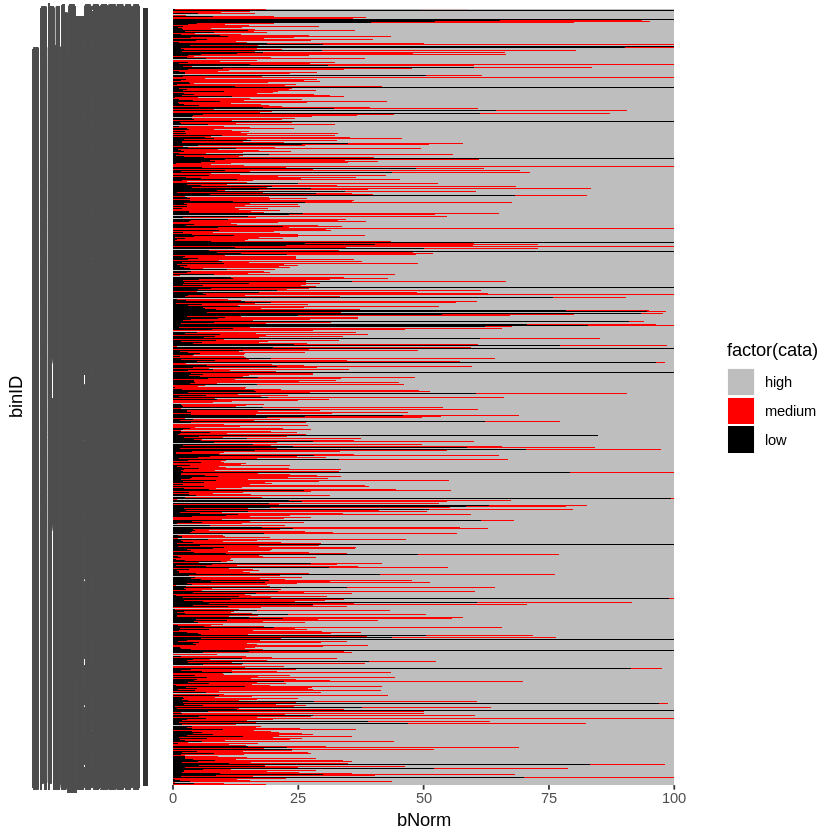

In [26]:
# B components
ggplot(data = df, aes(x = binID, y = bNorm, fill = factor(cata))) + 
  geom_bar(stat = "identity", width = 2) + coord_flip() + scale_fill_manual(values = c("grey", "red", "black"))

In [27]:
deltaAB <- df$aNorm - df$bNorm
df <- cbind(df, deltaAB)


In [30]:
df <- df[,-7]
df

,binID,meth,aNorm,bNorm,cata,deltaAB
22055,chr19_10000700,50.00000,4.705882,3.1894934,medium,1.5163889
22056,chr19_10000700,50.00000,3.529412,3.1894934,medium,0.3399183
22054,chr19_10000700,0.00000,91.764706,93.6210131,low,-1.8563073
22058,chr19_10001300,100.00000,66.406250,65.6108597,high,0.7953903
22057,chr19_10001300,66.66667,6.250000,4.5248869,medium,1.7251131
22059,chr19_10001300,66.66667,10.937500,14.0271493,medium,-3.0896493
22060,chr19_10001300,66.66667,12.500000,12.2171946,medium,0.2828054
22061,chr19_10001300,33.33333,2.343750,0.9049774,low,1.4387726
22062,chr19_10001300,33.33333,0.781250,1.3574661,low,-0.5762161
22063,chr19_10001300,0.00000,0.781250,1.3574661,low,-0.5762161


Warning message:
“position_stack requires non-overlapping x intervals”Warning message:
“position_stack requires non-overlapping x intervals”

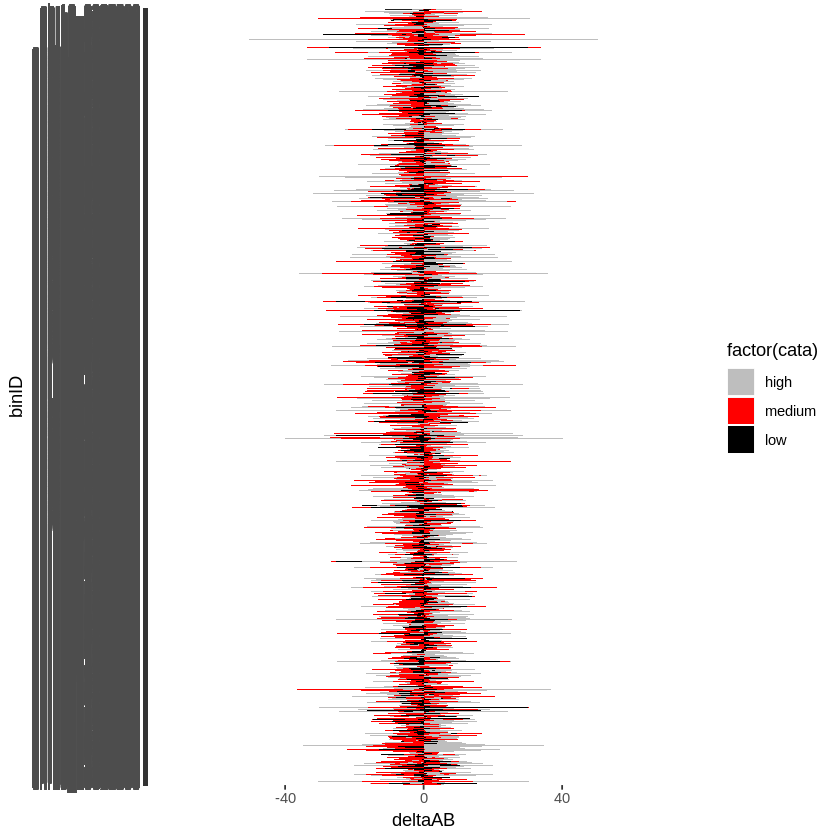

In [31]:
# Delta component


ggplot(data = df, aes(x = binID, y = deltaAB, fill = factor(cata))) + 
  geom_bar(stat = "identity", width = 2) + coord_flip() + scale_fill_manual(values = c("grey", "red", "black"))

In [36]:
classifiedData <- data.frame()

In [37]:
classifiedData
df

<0 x 0 matrix>

,binID,start,meth,aNorm,bNorm,cata
1,chr19_3079000,3078900,100.00000,69.230769,69.186047,high
2,chr19_3079000,3078900,50.00000,9.615385,9.883721,medium
3,chr19_3079000,3078900,50.00000,16.346154,18.023256,medium
4,chr19_3079000,3078900,0.00000,4.807692,2.906977,low
7,chr19_3079600,3079500,100.00000,79.452055,67.289720,high
6,chr19_3079600,3079500,50.00000,9.589041,8.411215,medium
8,chr19_3079600,3079500,50.00000,4.109589,9.345794,medium
5,chr19_3079600,3079500,0.00000,6.849315,14.953271,low
9,chr19_3079800,3079700,100.00000,53.472222,61.714286,high
10,chr19_3079800,3079700,50.00000,40.972222,27.428571,medium


In [38]:
sumA = df[1,]$aNorm
sumB = df[1,]$bNorm

for (i in 2:nrow(df)) {
    if (df[i,]$binID == df[i - 1,]$binID && df[i,]$cata == df[i - 1,]$cata){
        sumA = sumA + df[i,]$aNorm
        sumB = sumB + df[i,]$bNorm
    } else {
        classifiedData <- rbind(classifiedData, data.frame(binID = df[i - 1, 1], start = df[i - 1, 2], meth = df[i - 1, 3], aNorm = sumA, 
                                                           bNorm = sumB, cata = df[i - 1, 6]))
        sumA = df[i,]$aNorm
        sumB = df[i,]$bNorm
    }
}


In [39]:
head(df, 20)
head(classifiedData,10)

,binID,start,meth,aNorm,bNorm,cata
1,chr19_3079000,3078900,100.00000,69.230769,69.186047,high
2,chr19_3079000,3078900,50.00000,9.615385,9.883721,medium
3,chr19_3079000,3078900,50.00000,16.346154,18.023256,medium
4,chr19_3079000,3078900,0.00000,4.807692,2.906977,low
7,chr19_3079600,3079500,100.00000,79.452055,67.289720,high
6,chr19_3079600,3079500,50.00000,9.589041,8.411215,medium
8,chr19_3079600,3079500,50.00000,4.109589,9.345794,medium
5,chr19_3079600,3079500,0.00000,6.849315,14.953271,low
9,chr19_3079800,3079700,100.00000,53.472222,61.714286,high
10,chr19_3079800,3079700,50.00000,40.972222,27.428571,medium


binID,start,meth,aNorm,bNorm,cata
chr19_3079000,3078900,100,69.230769,69.186047,high
chr19_3079000,3078900,50,25.961538,27.906977,medium
chr19_3079000,3078900,0,4.807692,2.906977,low
chr19_3079600,3079500,100,79.452055,67.289720,high
chr19_3079600,3079500,50,13.698630,17.757009,medium
chr19_3079600,3079500,0,6.849315,14.953271,low
chr19_3079800,3079700,100,53.472222,61.714286,high
chr19_3079800,3079700,50,43.055556,34.285714,medium
chr19_3079800,3079700,0,3.472222,4.000000,low
chr19_3083900,3083800,100,100.000000,100.000000,high


In [40]:
write.csv(classifiedData, "new_chr19_static_classified.csv")